<a href="https://colab.research.google.com/github/po1ss0n/google_colabs/blob/main/analyze_top_channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
CSV_PATH = './drive/MyDrive/poisson-analyse/merged_channel_list.csv'

In [ ]:
df = pd.read_csv(CSV_PATH)
df.head()

<ipython-input-3-b70155dce1d8>:1: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH)


,channelId,channelTitle,customUrl,country,description,keywords,unsubscribedTrailer,publishedAt,hiddenSubscriberCount,subscriberCount,videoCount,viewCount,statusIsLinked,statusLongUploadsStatus,statusMadeForKids,statusPrivacyStatus,topicCategories,topicIds,rawJson
0,UCjp_3PEaOau_nT_3vnqKIvg,Junya.じゅんや,@junya1gou,JP,I will be the main character in this world!!!\...,"Junya TikTok ""Japan TikTok"" TikToker じゅんや ""jun...",3vIQ0UkCvK0,2020-09-14T05:31:55.163916Z,False,36900000,8558,22339271043,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Entertainment, h...","/m/02jjt, /m/02vxn, /m/019_rr, /m/09kqc","{'kind': 'youtube#channel', 'etag': 'TmiNCUTLF..."
1,UC6QZ_ss3i_8qLV_RczPZBkw,ISSEI / いっせい,@issei0806,JP,I hope for a world where you can laugh with pe...,"""issei 0806"" ISSEI ""ISSEI TikTok"" ""ISSEI funny...",y8MEMwSoAbQ,2014-07-23T08:12:29Z,False,37500000,2853,29887667825,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Food, https://en...","/m/02wbm, /m/02vxn, /m/09kqc, /m/02jjt","{'kind': 'youtube#channel', 'etag': 'FZQ3-YidA..."
2,UCWaOde99oeUVoXbIj3SNu9g,Sagawa /さがわ,@sagawa,JP,🟣TikTok👉 sagawa1gou\n🟠Instagram👉 sagawa1gou\n🔵...,NaN,zOgIgmd2AB0,2021-02-13T13:49:43.600987Z,False,32200000,8700,25655711285,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Film, https://en...","/m/02vxn, /m/019_rr, /m/02jjt, /m/09kqc","{'kind': 'youtube#channel', 'etag': 'AMHQrbK-N..."
3,UCbCJmNKAL85O1VFeD6Wj60g,Bayashi TV,@bayashitv_,JP,Cooking Video creator in Japan!!🎖\n50 million ...,Bayashi バヤシ ASMR Cooking Recipe mukbang food,h-TfCaWkkZY,2021-01-26T03:51:45.649588Z,False,27500000,1340,16228744583,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/02wbm","{'kind': 'youtube#channel', 'etag': 'FUrvpdsSw..."
4,UCKLbzfmjFv_oalDX8sHxhkQ,Saito,@saito09,JP,🟣TikTok👉saito09 \n🟡Instagram👉sait0o9\n\nThis ...,NaN,nWEGOqujsHA,2021-07-17T14:40:14.315379Z,False,22400000,5777,20335044574,True,longUploadsUnspecified,NaN,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/02jjt, /m/02vxn","{'kind': 'youtube#channel', 'etag': 'i1bTNWLHZ..."


In [ ]:
df.info()

df.dropna(subnet=['channelId']).shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43187 entries, 0 to 43186
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   channelId                43175 non-null  object 
 1   channelTitle             43180 non-null  object 
 2   customUrl                43169 non-null  object 
 3   country                  36404 non-null  object 
 4   description              39718 non-null  object 
 5   keywords                 28372 non-null  object 
 6   unsubscribedTrailer      29336 non-null  object 
 7   publishedAt              43168 non-null  object 
 8   hiddenSubscriberCount    43168 non-null  object 
 9   subscriberCount          43167 non-null  float64
 10  videoCount               43167 non-null  float64
 11  viewCount                43167 non-null  float64
 12  statusIsLinked           43168 non-null  object 
 13  statusLongUploadsStatus  43168 non-null  object 
 14  statusMadeForKids     

(43175, 19)

## チャンネル登録者数

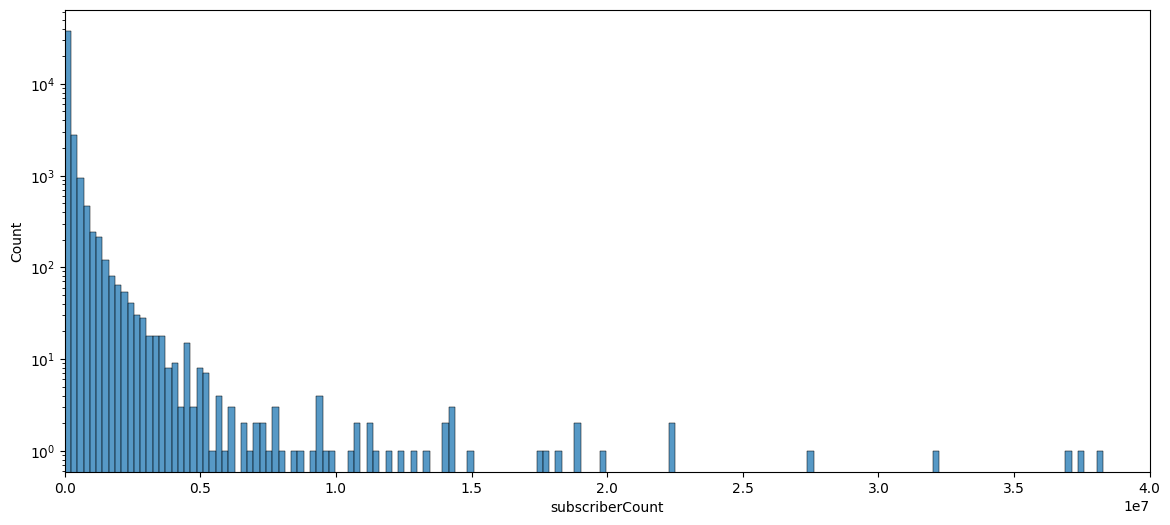

In [ ]:
def is_integer(x):
    try:
        int(x)
        return True
    except ValueError:
        return False

subscriberCount = df[df['subscriberCount'].apply(is_integer)]['subscriberCount']
subscriberCount = subscriberCount.astype(int)

plt.figure(figsize=(14, 6))
sns.histplot(subscriberCount, bins=200)
plt.xlim(left=0, right=40000000)
plt.yscale('log')

In [ ]:
key_counts = {}
keys = [10000, 20000, 50000, 100000, 200000, 500000, 1000000, 10000000, 20000000, 30000000]

for key in keys:
  key_counts[key] = (subscriberCount > key).sum()

for key, count in key_counts.items():
  print(f'{str(key).rjust(9, "_")}以上のチャンネル数: {count}')

____10000以上のチャンネル数: 42473
____20000以上のチャンネル数: 31426
____50000以上のチャンネル数: 18569
___100000以上のチャンネル数: 11218
___200000以上のチャンネル数: 5996
___500000以上のチャンネル数: 2232
__1000000以上のチャンネル数: 947
_10000000以上のチャンネル数: 30
_20000000以上のチャンネル数: 8
_30000000以上のチャンネル数: 5


In [ ]:
df[(subscriberCount > 10000).values]

ValueError: Item wrong length 43167 instead of 43187.

## 関連領域のYoutuberの調査

- 統計
- データサイエンス / データサイエンティスト
- 人工知能 / 機械学習
- 可視化 / データ可視化
- 検証 / 実証
- ランキング

### 「統計」を含むチャンネル: 43件

In [ ]:
contains_statistics = df['rawJson'].str.contains('統計', na=False)

print(f"{contains_statistics.sum()} 件の結果を表示")

# 結果を表示
df[contains_statistics]

43 件の結果を表示


,channelId,channelTitle,customUrl,country,description,keywords,unsubscribedTrailer,publishedAt,hiddenSubscriberCount,subscriberCount,videoCount,viewCount,statusIsLinked,statusLongUploadsStatus,statusMadeForKids,statusPrivacyStatus,topicCategories,topicIds,rawJson
706,UCECfnRv8lSbn90zCAJWC7cg,髙橋洋一チャンネル,@takahashi_yoichi,JP,髙橋洋一とは\n\n嘉悦大学教授、(株)政策工房会長、博士(政策研究) 数量政策学者。\n...,高橋洋一 髙橋洋一 政治 経済 官僚 学者 教授 総務大臣補佐官 財務官僚 内閣府参事官 内...,kLXNX-H58QE,2020-10-05T10:48:59.234192Z,False,1110000,1706,606171573,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Society,/m/098wr,"{'kind': 'youtube#channel', 'etag': 'nUmgiIDNt..."
1533,UCM2lyz-r88z3073oKf10TcA,陰陽師・橋本京明チャンネル,@hashimoto-kyomei,JP,本チャンネルでは一週間の占いのほか、視聴者の皆様や開運を目指す方々が、\n幸せを掴むための占...,"橋本京明 心霊 ""橋本京明 心霊"" ""橋本京明 除霊"" ""橋本京明 占い"" ""橋本京明 陰陽...",IVr57zTPQ2Y,2018-08-01T11:35:30Z,False,611000,417,190294609,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Society, https:/...","/m/098wr, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'feAiB2BLY..."
2738,UC6I4vtYv0c4KkGbzZHZxBsg,謎解き統計学 | サトマイ,@satomai811,JP,確率・統計を使って世の中の謎を解く「リアル謎解き」を体験していただく、教育エンターテイメント...,統計学 確率 マーケティング,DpoCl1aPJgw,2020-05-10T05:05:30.197812Z,False,385000,353,40817266,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/02jjt","{'kind': 'youtube#channel', 'etag': 'LaZpbQtWS..."
4211,UCBdFWB8q7igmwhlMjuflJCw,ポランチャンネル / Polan Channel,@polan_ch,JP,毎週投稿モドキです。\n主にマリオカート/ホラーゲーム/Minecraftをゆっくり実況して...,ゆっくり 実況 ゲーム,mHtAlg3T0u0,2015-03-12T04:46:25Z,False,261000,136,183880215,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Role-playing_vid...,"/m/0403l3g, /m/03hf_rm, /m/025zzc, /m/0bzvm2","{'kind': 'youtube#channel', 'etag': '9iOGjIFEr..."
8344,UCVQjzmyombBVX4HZvmAWWIQ,メディバリー大学病院 /医師監修,@medivery_daigaku_hospital,JP,身体・心・生活に役立つ情報を紹介し、健康と豊かな生活を手に入れるために必要な知識を配信中！\...,"""健康 病気"" 医学 医師 予防医学チャンネル 健康雑学",Sm5ik8MDKsg,2020-01-29T02:13:49.365124Z,False,132000,449,20846736,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/0kt51, /m/01k8wb","{'kind': 'youtube#channel', 'etag': 'FxRjdU0Tl..."
8806,UCUH_SzFp9YT2r3msqYjqiWw,田淵華愛の『最高の未来を思い出す』手相チャンネル,@kaai-tabuchi,JP,こんにちは、田淵華愛（たぶち かあい）です✨\n\nこちらのチャンネルでは、手相、占星術、暦...,手相 田淵 華愛 占い かあい 占星術 ホロスコープ,gGNm0WcUbh4,2017-11-23T01:51:32Z,False,125000,896,45934656,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/02jjt","{'kind': 'youtube#channel', 'etag': 'UIv1CtU4x..."
10364,UCsQq7nutfHAFUzZmubhvJ4A,パシンペロンはやぶさの開運『ぶっさんねる』,@user-id6bq1io4o,JP,スピリチュアル開運カウンセラー”はやぶさ”による 開運ch ♪月/木/土 ２０時公開\n\n...,ぶっさんねる 霊 霊感 霊媒師 霊能者 霊感診断 ネタぴぃぽぉ 守護霊 霊視 絖真命学 スピ...,0GffsKC4qEw,2020-01-27T06:27:56.419509Z,False,105000,539,15185655,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,/m/019_rr,"{'kind': 'youtube#channel', 'etag': '3Dl2bi_nL..."
10785,UC8s1FrVoPsTSbFSxsdWA11Q,東京総合研究所 / 金融庁登録の株式投資アドバイス,@tokyosoken,JP,登録投資助言業：関東財務局長（金商）第2507号\n⏹️東京総合研究所代表、大山充（投資顧問...,株式アドバイス 株式情報 日経平均先物 日経平均225 テクニカル分析 チャート 副業 先物...,qG4-BbOQMsw,2013-03-26T04:19:05Z,False,100000,3901,16486369,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Knowledge,/m/01k8wb,"{'kind': 'youtube#channel', 'etag': 'K6DG7DH84..."
12176,UC1bt4jsQi5JDW9tR-qaI4lg,雑学王子ミツル - 役立つ雑学,@326-zatsugaku,JP,このチャンネルでは『役に立つ雑学』をテーマに、\n日常生活で使える実践的な知識から、驚くべき...,ライフハック 雑学 豆知識 有益,hzCAWxCBy8M,2021-12-06T04:41:23.576729Z,False,86400,212,11683880,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Health, https://...","/m/0kt51, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'Mx8xhBDOB..."
12342,UCq5fY_J8i4PPlsGF2gFrP2Q,スキャトレふうた FX大学,@fuuta_fx,JP,Youtubeチャンネル登録者数８万人、X（旧ツイッター）フォロワー数５.５万人、株とFXで...,為替 FX初心者 トレード 投資 FX ポンド円 ドル円 スキャルピング デイトレード スキ...,NZjJWSKwlv8,2020-02-16T11:01:38.49095Z,False,84200,1209,14347995,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Knowledge,/m/01k8wb,"{'kind': 'y

### 「データサイエンス / データサイエンティスト」を含むチャンネル: 10件

In [ ]:
contains_data_science = df['rawJson'].str.contains('データサイエンス|データサイエンティスト', na=False)

print(f"{contains_data_science.sum()} 件の結果を表示")

# 結果を表示
df[contains_data_science]

10 件の結果を表示


,channelId,channelTitle,customUrl,country,description,keywords,unsubscribedTrailer,publishedAt,hiddenSubscriberCount,subscriberCount,videoCount,viewCount,statusIsLinked,statusLongUploadsStatus,statusMadeForKids,statusPrivacyStatus,topicCategories,topicIds,rawJson
10591,UCZQVTC3uLCyuJUOcRlguazA,にゃんたのAI実践チャンネル,@aivtuber2866,JP,チャンネルを見ていただき、ありがとうございます！\nAIVTuberのにゃんたと言います！\...,株式投資 VTuber AI python chatgpt,wdUS9LoKV_8,2022-07-30T12:16:35.502112Z,False,30500,117,1660077,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Knowledge, https...","/m/01k8wb, /m/07c1v, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'Nvt9urhUV..."
17081,UC2lJYodMaAfFeFQrGUwhlaQ,AIcia Solid Project,@aicia_solid,JP,データサイエンスVtuber アイシア=ソリッド（Aicia Solid）です。\n機械学習...,データサイエンス,NaN,2018-06-03T09:26:19Z,False,54300,300,3256401,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Knowledge,/m/01k8wb,"{'kind': 'youtube#channel', 'etag': 'gqbBFNCqV..."
17811,UCPvW2zifoZxQhJwZEubv6oQ,KAZ先生 (英語喉®︎),@eigonodo,US,英語の発音と聞き取り、そして英語のマスターに興味がある人集合！ \n\nシカゴ大学で社会学の...,英語喉 英語会話 TOEIC 英語発音 英会話 留学 Japanese language c...,tbEAwVxbZJI,2011-09-10T00:26:11Z,False,51300,746,6229290,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/01k8wb","{'kind': 'youtube#channel', 'etag': 'RtcmVmnF0..."
18220,UC1uj19dZQXa17-SqNGpVNLw,はやたす | Python・データサイエンスコーチ,@hayatasuuu,JP,フリーランスのデータサイエンティスト（Python / 機械学習）\n\nUdemy講座受講...,Python プログラミング 機械学習 AI データサイエンス,tcCS8SbEZyw,2020-01-03T04:56:15.131275Z,False,49600,124,2697280,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Technology, http...","/m/07c1v, /m/01k8wb, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'GNBFpbTrF..."
19401,UC0J7Yk_O3g1-x-xD7xxAE8Q,スタビジ【誰でもAIデータサイエンス】byウマたん,@aiby8596,JP,スタビジ（Statistics&Business）ではデータサイエンスを身近に感じてもらえる...,NaN,quFWgEQZQaM,2020-05-16T08:27:41.236586Z,False,45200,263,2571705,True,longUploadsUnspecified,NaN,public,https://en.wikipedia.org/wiki/Knowledge,/m/01k8wb,"{'kind': 'youtube#channel', 'etag': 'ZQpu6zdrj..."
24340,UCWnJn_Ccso2VGXtjEjh6ZYw,Juntendo University 順天堂大学,@juntendouniversity,NaN,順天堂は、江戸後期の天保9（1838）年に学祖・佐藤泰然が江戸・薬研堀に設立したオランダ医学...,"順天堂 順天堂大学 Juntendo ""Juntendo University"" 医学部 保...",ZJMeOAo1DoA,2014-06-17T02:11:57Z,False,31800,362,7513958,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Knowledge, https...","/m/01k8wb, /m/0kt51, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'CUGDqVSiB..."
24633,UCbKIELKyWWIoKRFutAiJc4Q,人工知能とんすけえええええええええええええ,@tonnsuke,JP,数学/統計/人工知能/英語/留学\nメール：tonnsukechannel@gmail.co...,数学 統計 英語 留学 受験 勉強法 大学受験 受験数学 検定 スピーキング リスニング 大...,7TgXff3tqn8,2020-11-16T03:31:03.791334Z,False,31100,222,7128155,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Knowledge, https...","/m/01k8wb, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'fodRY0jD_..."
24962,UCZQVTC3uLCyuJUOcRlguazA,にゃんたのAI実践チャンネル,@aivtuber2866,JP,チャンネルを見ていただき、ありがとうございます！\nAIVTuberのにゃんたと言います！\...,株式投資 VTuber AI python chatgpt,wdUS9LoKV_8,2022-07-30T12:16:35.502112Z,False,30500,117,1660077,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/07c1v, /m/01k8wb","{'kind': 'youtube#channel', 'etag': 'ZUmzqUTCd..."
39483,UCOELxR-yS2EbjBxQ0hx4yBw,nnabla ディープラーニングチャンネル,@nnabla,JP,ソニーで働く研究者たちが、自社開発中のオープンソースソフトウェアや最先端論文などの最新AI情...,"""Deep Learning"" ディープラーニング 深層学習 ニューラルネットワーク 機械学...",NaN,2021-02-04T01:39:40.597906Z,False,12300.0,234.0,425687.0,True,longUploadsUnspecified,NaN,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/01k8wb, /m/07c1v","{'kind': 'youtube#channel', 'etag': 'S-qsPpI1b..."
41418,UCXvZVTkI7QD4nD42n20Ettg,マインドリープ MindLeap,@mind_leap,JP,マインドリープ MindLeap\n『未来のパートナーはあなた自身。マインドリープへようこそ...,一般社団法人デジタルイノベーション DX イノベーション オープンイノベーション サステナブ...,unL7n8_nAWU,2014-01-20T13:51:42Z,False,11000.0,577.0,707729.0,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Society, https:/...","/m/09

### 「人工知能 / 機械学習」を含むチャンネル: 37件

In [ ]:
contains_ml = df['rawJson'].str.contains('人工知能|機械学習', na=False)

print(f"{contains_ml.sum()} 件の結果を表示")

# 結果を表示
df[contains_ml]

37 件の結果を表示


,channelId,channelTitle,customUrl,country,description,keywords,unsubscribedTrailer,publishedAt,hiddenSubscriberCount,subscriberCount,videoCount,viewCount,statusIsLinked,statusLongUploadsStatus,statusMadeForKids,statusPrivacyStatus,topicCategories,topicIds,rawJson
1112,UC8g17oXkRt8buwQL8GU-NSw,ラムダ技術部,@lambdatech,JP,主に技術系の真面目な動画や不真面目な動画を投稿しています。\n不真面目な動画の方が伸びるので...,技術 情報 プログラミング 人工知能 雑学 料理 理系 ラムダ技術部 ラムダ 理科 数学,1SOgvM_zrRw,2015-03-08T07:21:31Z,False,784000,345,391738192,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Food, https://en...","/m/02wbm, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'VzBAeAsOj..."
5589,UC9yE5zNQtT-sItF53GfQs7w,ぷらぐら,@pragraa,JP,PCソフトやブラウザ、プログラミング関連の動画を投稿しています！ぜひ見てね～！\n\nこんな...,ゆっくり解説 ゆっくり AI プログラミング 技術 DTM Python 人工知能,v-ntv1fv2vk,2021-03-08T11:48:16.701536Z,False,199000,96,20263873,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Technology, http...","/m/07c1v, /m/0bzvm2, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'uvtgZktvT..."
6827,UCOXxfCRhJfwB5sMC1aCRJ3Q,2030年の未来予測@広島弁フューチャリスト友村晋,@tomomura,JP,生成AIの未来予測チャンネル。広島弁のフューチャリスト（未来予測士）。「自分の力でお金を稼ぐ...,AI 人工知能 教育 子育て 仕事 ビジネス 経営者 育児 独立 転職 起業 ベンチャー 最...,NaN,2019-02-25T11:50:25Z,False,163000,184,12900695,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/098wr, /m/01k8wb","{'kind': 'youtube#channel', 'etag': 'TWm7aaXln..."
7148,UC0xRMqPOyRNPTaL6BxhbCnQ,いまにゅのプログラミング塾,@imanyu_programming,JP,いまにゅのプログラミング塾では、初学者・中級者向けに「Python」「Google Apps...,"Python プログラミング 教育 講座 初学者 入門 業務効率化 GAS ""Google ...",okpRV08-svw,2018-09-25T06:51:40Z,False,156000,210,13878600,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Technology, http...","/m/07c1v, /m/01k8wb, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'MgEv70cy1..."
8221,UClNZUVnSFRKKUfJYarEUqdA,ウェブ職TV,@webshokutv,JP,このチャンネルではブログ、アフィリエイト、最新AI、ChatGPT、プログラミングなどの話題...,アフィリエイト ブログ AI ChatGPT,cwUkPgufHEc,2020-02-04T05:34:46.533442Z,False,134000,2324,23201162,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/01k8wb","{'kind': 'youtube#channel', 'etag': 'fMw1dXGLG..."
9073,UCq9hNnt2qiEWD1nyO7X2G-Q,ミリタリーニュース,@user-ph8fq4ug7m,JP,「運命」をご紹介致します。「運命」では、地球上の驚くべきものや神秘的な場所、そして私たちを取...,宇宙 科学 起こる リドル なぞなぞ 運命 起こる 起こる サイエンス スマート 実験 地震...,NaN,2020-01-23T12:23:41.456027Z,False,120000,204,58879571,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/07yv9, /m/01h6rj, /m/098wr","{'kind': 'youtube#channel', 'etag': 'dQn1B_HUG..."
9237,UCe325LAv72VWbmPvFEcZBcA,神のみぞ知る,@gokdayo,JP,「神々のみが真相を知っていそうなこと」をテーマにしたチャンネル。\n最新ニュース・人類・ヤバ...,雑学 科学 健康 人体 都市伝説 ニュース 解説 犯罪 ミステリー 人体科学 実験 ゆっくり解説,1Dy1mvOPvO4,2022-03-13T08:44:29.020617Z,False,119000,98,8598845,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Knowledge, https...","/m/01k8wb, /m/098wr","{'kind': 'youtube#channel', 'etag': 'WG1uEty6D..."
9430,UCF5_b1FCKAX_GvRu7ePMG3w,苫米地英人YouTube 公式チャンネル,@user-lk5yl1go7t,JP,苫米地英人プロフィール\n\n1959年、東京生まれ。認知科学者（計算言語学・認知心理学・機...,"苫米地英人 苫米地音源 機能音源 ""Functional Sound""",NaN,2016-03-14T07:20:31Z,False,116000,66,6302700,True,longUploadsUnspecified,False,public,NaN,NaN,"{'kind': 'youtube#channel', 'etag': 'Pc1p_UCU4..."
11860,UCIvVJaNmUFJ8MKpyBfgslCg,茂木健一郎の脳の教養チャンネル,@kenmogi,JP,一人ひとりの「個性」が活かせて、「自由」で、「創造的」な生き方ができるように、応援するような...,NaN,NaN,2006-12-30T06:55:34Z,False,88300,5968,24207754,True,longUploadsUnspecified,False,public,NaN,NaN,"{'kind': 'youtube#channel', 'etag': '2aC80hTDv..."
12584,UCfapRkagDtoQEkGeyD3uERQ,KEITO【AI&WEB ch】,@keitoaiweb,JP,AI × WEB YouTuber 兼 ディレクター。\n\nこのチャンネルではChatGP...,AI 人工知能 WEB IT ウェブ インターネット テクノロジー,pTSS9OQOpq4,2023-01-25T16:04:25.255571Z,False,82500,341,6565643,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/07c1v, /m/01k8wb","{'kind': 'youtube#channel', 'etag': 'oe7Q10kVJ..."


### 「可視化 / データ可視化」を含むチャンネル: 8件

In [ ]:
contains_visualization = df['rawJson'].str.contains('可視化', na=False)

print(f"{contains_visualization.sum()} 件の結果を表示")

# 結果を表示
df[contains_visualization]

8 件の結果を表示


,channelId,channelTitle,customUrl,country,description,keywords,unsubscribedTrailer,publishedAt,hiddenSubscriberCount,subscriberCount,videoCount,viewCount,statusIsLinked,statusLongUploadsStatus,statusMadeForKids,statusPrivacyStatus,topicCategories,topicIds,rawJson
885,UC2j1I4dzlC5M7EkFiDmv88g,ちぐさくん【AMPTAK】,@tigusakun,JP,☆目標は今年中に100万人❗☆\n\n声を使って歌やアニメで盛り上げ中！✨️\n沢山応援して...,ちぐさ ちぐさくん シチュボ イケボ ショタボ 配信者 ツイキャス かわいい かっこいい シ...,QX0vsCH32Ks,2019-11-11T00:07:35.359508Z,False,938000,343,551011463,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Film, https://en...","/m/02vxn, /m/02jjt, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'qMPmVPhlz..."
4709,UCHk5QD2cZFzhUXcokAGXeqg,メタボールスタジオ,@metaballstudiosjp,JP,この世のいろいろ可視化してみよう\n,NaN,923704zTrNc,2022-06-20T06:39:05.836291Z,False,235000,196,97844759,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,/m/019_rr,"{'kind': 'youtube#channel', 'etag': 'kdC3MAxB8..."
19581,UCq_vpWj2ZW8doksXpxkMAnw,WebマーケティングTV【StockSun株式会社】,@stocksun-web-1082,JP,WebマーケティングのリアルをStockSun株式会社がお届けします。\n\nブラックボック...,StockSun-WEBコンサルティング StockSun SS SSチャンネル Stock...,aCTZ3jYqPFk,2019-07-11T13:09:26Z,False,44800,805,8487912,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Entertainment, h...","/m/02jjt, /g/120y8l81, /m/01k8wb","{'kind': 'youtube#channel', 'etag': 'TTUbFUc7u..."
21356,UCGNd0qq4DC3fNVKbj6g5WDw,【FX】維新の介トレードチャンネル,@ishinryujp-eurjpy,JP,"【維新の介】\n累計28,000人以上を指導した現役プロトレーダー\n\n独自のトレード技術...",FX ユーロ円 テクニカル 相場 維新流 ファンダメンタルズ 維新の介 トレード トレーダー...,txSBfVPAQeo,2015-04-22T01:32:59Z,False,39000,713,4480876,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Knowledge,/m/01k8wb,"{'kind': 'youtube#channel', 'etag': 'RlTRHy9nG..."
24217,UCmw7DsSCQzRcRG6-SHE_ksg,地震速報24h,@eqlive24,JP,リアルタイムの地震発生状況を映像（情報可視化）と読み上げ実況音声で確認できます。\n2015...,地震ライブ 24時間 地震速報 強震モニタ 地震,ImxIiP2FIw0,2015-05-03T07:26:06Z,False,31900,221,1360548,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Video_game_culture,/m/0bzvm2,"{'kind': 'youtube#channel', 'etag': 'a2noF2YA4..."
25272,UCywnAZhXindfqW0vHhvvciQ,LMYK Official YouTube Channel,@lmyk,NaN,LMYK Official YouTube Channel\n\nLMYK\n（読み：エルエ...,NaN,zzJf7Jy2Xdc,2020-11-02T08:00:50.762977Z,False,29900,85,14516196,True,longUploadsUnspecified,NaN,public,"https://en.wikipedia.org/wiki/Music_of_Asia, h...","/m/028sqc, /m/064t9, /m/04rlf","{'kind': 'youtube#channel', 'etag': '7vBZcauVv..."
25935,UCsJnPgharPPqfWrXoqRXV5w,motormanonline cars,@motormanonline,JP,■チャンネル内容\n\n当チャンネルは、車及びカー用品を中心にレビュー動画を配信しています。...,"""motormanonline cars"" 車 新車 中古車 車両 ステップワゴン 新型 ハ...",X5ClqTwv0co,2013-01-19T08:47:47Z,False,28400,1306,28769126,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Technology, http...","/m/07c1v, /m/019_rr, /m/07yv9","{'kind': 'youtube#channel', 'etag': '1sHjFC5m5..."
32567,UCsSQA8DcTYw03LMoyuD_7FQ,開運金運引き寄せ波動,@hikiyose,JP,このチャンネルを見つけて頂き\nありがとうございます。\n\n流すだけで\n金運をはじめとす...,開運 浄化 邪気 祓い 幸運 引き寄せ フェジオ周波数 臨時収入 金運 金運アップ 即効性 ...,UrE1-LdXpnU,2022-01-28T09:02:05.374336Z,False,18500,1759,5642261,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Health, https://...","/m/0kt51, /m/098wr, /m/06bvp, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'oxemK_BT0..."


### 「検証 / 実証」を含むチャンネル: 416件

In [ ]:
contains_statistics = df['rawJson'].str.contains('検証|実証', na=False)

print(f"{contains_statistics.sum()} 件の結果を表示")

# 結果を表示
df[contains_statistics]

416 件の結果を表示


,channelId,channelTitle,customUrl,country,description,keywords,unsubscribedTrailer,publishedAt,hiddenSubscriberCount,subscriberCount,videoCount,viewCount,statusIsLinked,statusLongUploadsStatus,statusMadeForKids,statusPrivacyStatus,topicCategories,topicIds,rawJson
96,UCg3qsVzHeUt5_cPpcRtoaJQ,圧倒的不審者の極み!,@kiwami-japan,JP,「どうも！圧倒的不審者の極みです♡」\n主に包丁を研いだり作ったりする専門チャンネルです\n...,"ナイフ 包丁 研ぐ sharpen sharping ""Kitchen knife"" 自作 ...",Oadf4KNYz-I,2016-09-24T09:47:54Z,False,3490000,75,616516143,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Food, https://en...","/m/02wbm, /m/019_rr, /m/03glg","{'kind': 'youtube#channel', 'etag': 'j07R9m10F..."
350,UCgQgMOBZOJ1ZDtCZ4hwP1uQ,ラファエル Raphael,@raphael1588,JP,raphael-official.com,話題 人気 面白い 自衛隊 ドッキリ 検証 モニタリング トレンド ラファエル 潜入 エンタ...,7PxAK1cuWCM,2015-11-17T16:09:56Z,False,1730000,1917,933699821,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/02jjt","{'kind': 'youtube#channel', 'etag': 'tPNpzwuPH..."
374,UCJy7zfLsKBXoo2soFMum7JQ,あかさかの箱,@akasakabox,JP,ハローエブリワン！あかさかの箱です📦\nチャンネル登録・高評価よろしくお願いします!!\n\...,とび森 どう森 どうぶつの森 とびだせどうぶつの森 あつ森 あつもり ゲーム実況 ゲーム 実...,MBg1Rr5GDh0,2016-07-15T08:43:27Z,False,1690000,2328,727334960,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Action-adventure...,"/m/02ntfj, /m/0bzvm2, /m/0403l3g","{'kind': 'youtube#channel', 'etag': 'TR5czfqYK..."
389,UChdm3NwkRpuyCAxVRTzPQ9g,SAWAYAN CHANNEL / サワヤン チャンネル,@sawayanchannel,JP,高学歴外国人”の”仲良し兄弟”が日本のカルチャー、観光名所、ゲーム、スポーツ、食事など日本に...,サワヤン,NaN,2020-01-12T16:24:34.491845Z,False,1620000,588,506745745,True,longUploadsUnspecified,NaN,public,"https://en.wikipedia.org/wiki/Food, https://en...","/m/02wbm, /m/019_rr, /m/02jjt","{'kind': 'youtube#channel', 'etag': 'TCENogm4R..."
579,UCyo6aLuDHbUoNTv-NR-Y0NA,ハイサイ探偵団,@hittyaso,JP,ハイサイ探偵団とは\n・○○を調査してほしい\n・○○を検証してほしい\n・○○に挑戦してほ...,コメディー,IgHX_bs7wyg,2012-03-10T12:55:41Z,False,1240000,3523,1108098360,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Hobby, https://e...","/m/03glg, /m/019_rr, /m/068hy","{'kind': 'youtube#channel', 'etag': 'rYXOnVP0l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42757,UCBtBVy7eIrfAQ4kbV-AxD1Q,A太郎Kickz,@atarokickz,JP,新世代 SNEAKER KING👑\n\nこのチャンネルは、A太郎の好きな事(主にスニーカー...,NaN,O8RtYE7Aq6s,2021-09-14T03:34:33.793051Z,False,10200.0,138.0,2051676.0,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Hobby, https://e...","/m/03glg, /m/019_rr, /m/032tl","{'kind': 'youtube#channel', 'etag': 'KlrD23lC1..."
42812,UCaXGDm4d9brr9zmPZETthiw,閉鎖,@youtuber-hz8qr,JP,NaN,やってみた 商品紹介 実験 検証 面白 趣味,NaN,2014-05-10T09:06:34Z,False,10200.0,0.0,0.0,True,longUploadsUnspecified,NaN,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,/m/019_rr,"{'kind': 'youtube#channel', 'etag': 'TTCQoCKfS..."
42830,UCoeyNPiOy8rNIvNJ7n98pjA,BANBANBAN_TV,@banbanban_tv,JP,仕事も遊びも全力がモットーです( ・∇・)\nチャンネル登録お願いします💓\n\nSDGsに...,japanese japan トレンド 話題 検証 紹介 あるある 日本 trend Jap...,Q-BFvp0n0cs,2016-07-02T12:49:42Z,False,10200.0,160.0,449748.0,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Tourism, https:/...","/g/120yrv6h, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'npJPxaGD0..."
42913,UCbOAbbOpTdRR2IglyBmpZng,wakatte.tv,@wakattetv,JP,この番組は全国の受験生、高校生のみんなに\n『絶対にこんな大人になるなよ！』という思いを込め...,バラエティ 高学歴 お笑い UCbOAbbOpTdRR2IglyBmpZng bOAbbOp...,7bhp1NSGuxo,2017-08-29T03:43:36Z,False,555000.0,1654.0,705596132.0,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Entertainment,/m/02jjt,"{'kind': 'youtube#channel', 'etag': 'wZaR7K2ae..."


### 「ランキング」を含むチャンネル: 141件

In [ ]:
contains_ranking = df['rawJson'].str.contains('グラフ', na=False)

print(f"{contains_ranking.sum()} 件の結果を表示")

# 結果を表示
df[contains_ranking]

141 件の結果を表示


,channelId,channelTitle,customUrl,country,description,keywords,unsubscribedTrailer,publishedAt,hiddenSubscriberCount,subscriberCount,videoCount,viewCount,statusIsLinked,statusLongUploadsStatus,statusMadeForKids,statusPrivacyStatus,topicCategories,topicIds,rawJson
633,UCn1qbwd476aiRH9d8RT5D0Q,VOGUE JAPAN,@voguejapan,JP,1892年に米国で創刊し、現在20カ国で発行される、世界で最も影響力のあるファッション誌『V...,VOGUE JAPAN ヴォーグ ファッション 東京 Tokyo コレクション モデル ブラ...,jk0ImZ3vDiA,2013-08-16T08:40:25Z,False,1190000,1477,471163318,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Fashion, https:/...","/m/032tl, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'XPqr0mxMT..."
882,UC1N2_2vCoyd3EvGcVuwTfmw,ナショナル ジオグラフィック TV,@natgeotv_jp,JP,好奇心を刺激する世界最高峰のドキュメンタリーチャンネル「ナショナル ジオグラフィック」の公式...,National Geographic ナショジオ 実験 ナショナルジオグラフィック 動物 科学,54PZruhQWqw,2019-01-25T06:27:53Z,False,938000,1508,299050786,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Entertainment, h...","/m/02jjt, /m/0f2f9, /m/02vxn","{'kind': 'youtube#channel', 'etag': 'JMowkTXTX..."
1082,UChNkqst-cjAoIbXb-ukn_tQ,BE:FIRST Official,@befirstofficial,JP,BE:FIRST - SOTA / SHUNTO / MANATO / RYUHEI / J...,NaN,6KEqMEmyuIs,2021-07-10T16:27:22.235907Z,False,801000,271,772982273,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Music, https://e...","/m/04rlf, /m/02jjt, /m/028sqc","{'kind': 'youtube#channel', 'etag': 'E8HU_MLCY..."
1512,UCjU51lhtpje-r0eF4b0jpbw,amazarashi Official YouTube Channel,@amazarashismej,NaN,amazarashi（あまざらし）\n\n青森県在住の秋田ひろむを中心とするバンド。\n日常...,amazarashi アマザラシ あまざらし,tn-fJxLtpNw,2013-12-02T10:24:07Z,False,617000,129,296627050,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Pop_music, https...","/m/064t9, /m/06by7, /m/028sqc, /m/04rlf","{'kind': 'youtube#channel', 'etag': 'MmZW1OnBK..."
1705,UCJeCKqR6uqrdCw6021WuWlA,ポルノグラフィティ Official YouTube Channel,@pornograffitti_official,JP,岡野昭仁（Vo）、新藤晴一（Gt）によるロックバンド。\n広島県因島出身。1999 年、「ア...,ポルノグラフィティ,Curu9AIX598,2012-01-10T09:34:48Z,False,566000,309,456059810,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Pop_music, https...","/m/064t9, /m/06by7, /m/028sqc, /m/04rlf","{'kind': 'youtube#channel', 'etag': '2uHAzVtYY..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41323,UCqv9csnK40cjpc2grTI25sQ,ゆーにー / YUUNII,@yuunii0801,JP,どうも、ゆーにーです！\nYouTubeチャンネルをご覧いただきありがとうございます。\nこ...,ライフスタイル ガジェット レビュー カメラ ビデオグラファー Vlog,NaN,2020-07-19T02:56:23.163169Z,False,11100.0,282.0,4110046.0,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Technology, http...","/m/07c1v, /m/019_rr, /m/03glg","{'kind': 'youtube#channel', 'etag': 'PnawYKoQN..."
41507,UC-74wcE1sa1Subi_jbK0csg,バスグラフィックTV,@busgraphictv,JP,powerd by バスギア https://www.bus-gear.com\nバス専門誌...,NaN,NaN,2019-11-14T12:23:06.000957Z,False,11000.0,56.0,1489445.0,True,longUploadsUnspecified,NaN,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,/m/019_rr,"{'kind': 'youtube#channel', 'etag': 'I_y2EdTah..."
41952,UCKF5a-oFD9fuwheuos30y2w,ASRock Japan,@asrockjapan,JP,ASRock JapanのYouTubeチャンネルです。\n台湾のPCパーツメーカASRoc...,NaN,NaN,2020-05-21T08:43:50.065404Z,False,10800.0,325.0,1381302.0,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Entertainment, h...","/m/02jjt, /m/07c1v, /m/019_rr","{'kind': 'youtube#channel', 'etag': 'szNMOrzrE..."
42747,UCCfXcuyB2JO7PjpzXYWb1_Q,Storage of Line-Ups,@storageofline-ups1768,JP,This channel visualizes 3 types of football Li...,グラフ ランキング 統計,NaN,2020-05-20T02:05:57.089315Z,False,10200.0,10.0,10613754.0,True,longUploadsUnspecified,NaN,public,"https://en.wikipedia.org/wiki/Music, https://e...","/m/04rlf, /m/02vx4, /m/06ntj","{'kind': 'youtube#channel', 'etag': 'KvyVyaCv3..."


## 相関分析してみる

In [ ]:
df.head()

,channelId,channelTitle,customUrl,country,description,keywords,unsubscribedTrailer,publishedAt,hiddenSubscriberCount,subscriberCount,videoCount,viewCount,statusIsLinked,statusLongUploadsStatus,statusMadeForKids,statusPrivacyStatus,topicCategories,topicIds,rawJson
0,UCjp_3PEaOau_nT_3vnqKIvg,Junya.じゅんや,@junya1gou,JP,I will be the main character in this world!!!\...,"Junya TikTok ""Japan TikTok"" TikToker じゅんや ""jun...",3vIQ0UkCvK0,2020-09-14T05:31:55.163916Z,False,36900000,8558,22339271043,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Entertainment, h...","/m/02jjt, /m/02vxn, /m/019_rr, /m/09kqc","{'kind': 'youtube#channel', 'etag': 'TmiNCUTLF..."
1,UC6QZ_ss3i_8qLV_RczPZBkw,ISSEI / いっせい,@issei0806,JP,I hope for a world where you can laugh with pe...,"""issei 0806"" ISSEI ""ISSEI TikTok"" ""ISSEI funny...",y8MEMwSoAbQ,2014-07-23T08:12:29Z,False,37500000,2853,29887667825,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Food, https://en...","/m/02wbm, /m/02vxn, /m/09kqc, /m/02jjt","{'kind': 'youtube#channel', 'etag': 'FZQ3-YidA..."
2,UCWaOde99oeUVoXbIj3SNu9g,Sagawa /さがわ,@sagawa,JP,🟣TikTok👉 sagawa1gou\n🟠Instagram👉 sagawa1gou\n🔵...,NaN,zOgIgmd2AB0,2021-02-13T13:49:43.600987Z,False,32200000,8700,25655711285,True,longUploadsUnspecified,False,public,"https://en.wikipedia.org/wiki/Film, https://en...","/m/02vxn, /m/019_rr, /m/02jjt, /m/09kqc","{'kind': 'youtube#channel', 'etag': 'AMHQrbK-N..."
3,UCbCJmNKAL85O1VFeD6Wj60g,Bayashi TV,@bayashitv_,JP,Cooking Video creator in Japan!!🎖\n50 million ...,Bayashi バヤシ ASMR Cooking Recipe mukbang food,h-TfCaWkkZY,2021-01-26T03:51:45.649588Z,False,27500000,1340,16228744583,True,longUploadsUnspecified,False,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/02wbm","{'kind': 'youtube#channel', 'etag': 'FUrvpdsSw..."
4,UCKLbzfmjFv_oalDX8sHxhkQ,Saito,@saito09,JP,🟣TikTok👉saito09 \n🟡Instagram👉sait0o9\n\nThis ...,NaN,nWEGOqujsHA,2021-07-17T14:40:14.315379Z,False,22400000,5777,20335044574,True,longUploadsUnspecified,NaN,public,https://en.wikipedia.org/wiki/Lifestyle_(socio...,"/m/019_rr, /m/02jjt, /m/02vxn","{'kind': 'youtube#channel', 'etag': 'i1bTNWLHZ..."


<ipython-input-37-0d84db947307>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nc['publishedTimestamp'] = pd.to_datetime(df['publishedAt'], format='mixed', errors='coerce').astype(int) // 10**9


<Axes: >

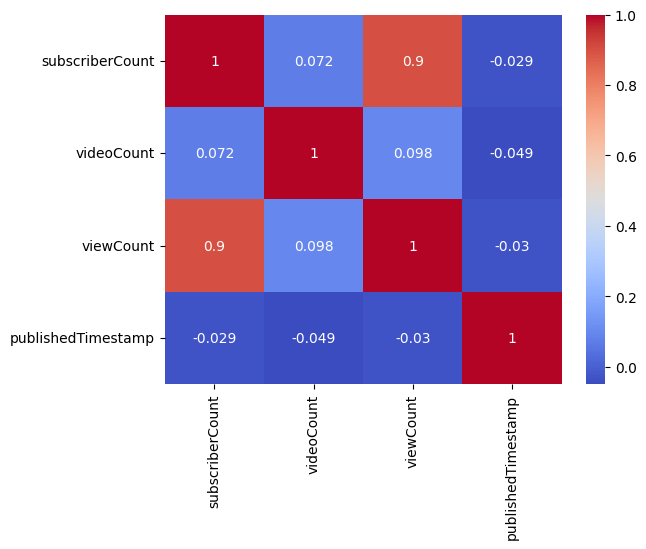

In [ ]:
# 数値に変換可能な列を数値に変換
numeric_cols = ['subscriberCount', 'videoCount', 'viewCount']
df_nc = df[numeric_cols]
df_nc['publishedTimestamp'] = pd.to_datetime(df['publishedAt'], format='mixed', errors='coerce').astype(int) // 10**9
df_nc = df_nc.apply(pd.to_numeric, errors='coerce')

# 欠損値を平均で埋める
df_nc.fillna(df_nc.mean(), inplace=True)

sns.heatmap(df_nc.corr(), annot=True, cmap='coolwarm')